In [1]:
import numpy as np
from netCDF4 import Dataset 
import matplotlib.pyplot as plt 
import myfunctions as mf
from matplotlib.pyplot import cm
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib.ticker import ScalarFormatter
import math 
import itertools
import operator

In [21]:
head = "/exports/csce/datastore/geos/users/s1215319/paper3/version2/1dfiles/o2_lifetimes/"

### Accelerated CH4 Directory
fast = "webster_diurnal"

### Solar Longitudes to Plot
ls_study = [0,45,90,135,180,225,270,315,71,251,345]

### CH4 Lifetime's studied
## Lifetimes of CH4 below layer 5 in the model 
enhancements = ['15min', '30min', 'hr', '2hr', '3hr', '4hr', '5hr', '6hr', '12hr', '24hr', 'week' ,'month' ,'6month', 'year']
enhancement_labels =['15 min.', '30 min.', '1 Hour',\
                    '2 Hours', '3 Hours', '4 Hours',\
                    '5 Hours', '6 Hours', '12 Hours', '1 Day',\
                    '1 Week', '1 Month', '6 Months', '1 Year']

(1e-12, 1e-06)

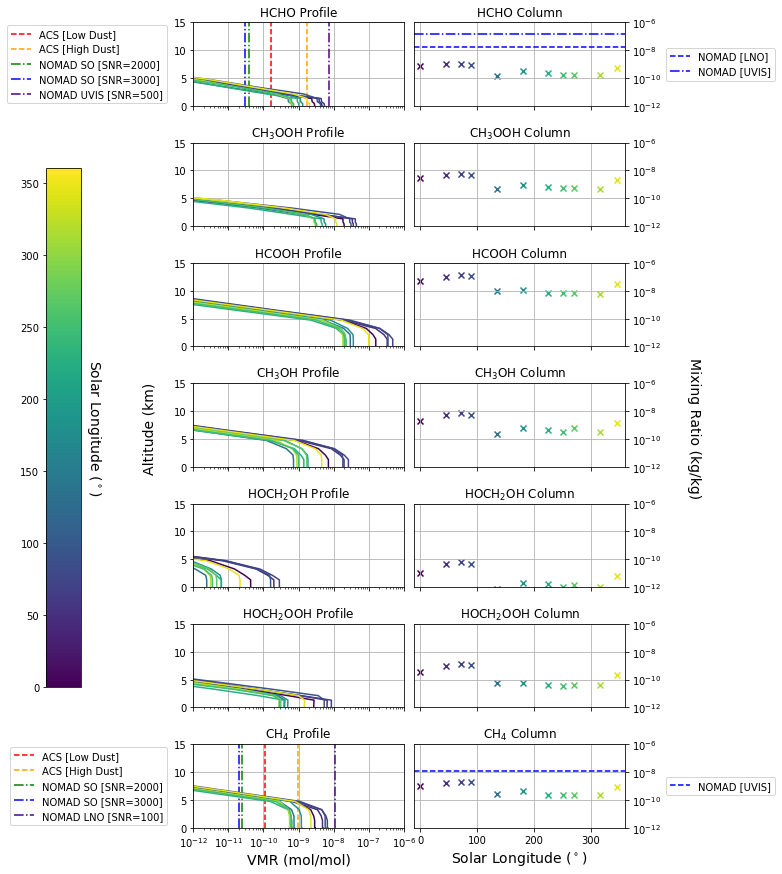

In [26]:
orgs = ['hcho','ch3ooh','hcooh','ch3oh','hoch2oh','hoch2ooh', 'ch4']

plt.rcParams['axes.grid'] = True

fig,axs = plt.subplots(7,2,sharex='col',sharey='col')

fig.set_figheight(12)
fig.set_figwidth(12)

axs[0,0].set_xlim(1.e-15,1.e-7)
axs[0,0].set_ylim(0.,15.)

axs[0,1].set_yscale("log")
axs[0,1].set_ylim(1.e-15,1.e-6)

cNorm = colors.Normalize(vmin=0, vmax=360.)
cmp = plt.get_cmap('viridis')
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=cmp)
scalarMap.set_array([])

# fig.subplots_adjust(bottom=0.2)
# cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.05])

## ======================
## NADIR Detection Limits
## ======================
## HCHO 
## ----
##
## NOMAD - [16, 150] PPB [LNO,UVIS]
axs[0,1].axhline(y=16.e-9,linestyle = '--', color = 'b', label = 'NOMAD [LNO]')
axs[0,1].axhline(y=150.e-9,linestyle = '-.', color = 'b', label = 'NOMAD [UVIS]')
##
## CH4
## ---
## NOMAD - 11 PPB [LNO]
axs[-1,1].axhline(y=11.e-9,linestyle = '--', color = 'b', label = 'NOMAD [UVIS]')


## ===================
## SO Detection Limits 
## ===================
# HCHO
# ----
## ACS - [0.17, 1.7] PPB [low dust, high dust]
## NOMAD - [0.04, 0.03, 7.5] PPB [SO(SNR=2000), SO(SNR=3000), UVIS(SNR=500)]
axs[0,0].axvline(x=0.17e-9,linestyle = '--', color = 'red', label = 'ACS [Low Dust]')
axs[0,0].axvline(x=1.7e-9,linestyle = '--', color = 'orange', label = 'ACS [High Dust]')

axs[0,0].axvline(x=0.04e-9,linestyle='-.',color='g',label = 'NOMAD SO [SNR=2000]')
axs[0,0].axvline(x=0.03e-9,linestyle='-.',color='b',label = 'NOMAD SO [SNR=3000]')
axs[0,0].axvline(x=7.5e-9,linestyle='-.',color='indigo',label = 'NOMAD UVIS [SNR=500]')

## CH4
# ---
## ACS - [0.11, 0.97] PPB [low dust, high dust]
## NOMAD - [0.025, 0.020, 11] PPB [SO(SNR=2000), SO(SNR=3000), LNO(SNR=100) ]
axs[-1,0].axvline(x=0.11e-9,linestyle = '--', color = 'red', label = 'ACS [Low Dust]')
axs[-1,0].axvline(x=0.97e-9,linestyle = '--', color = 'orange', label = 'ACS [High Dust]')

axs[-1,0].axvline(x=0.025e-9,linestyle='-.',color='g', label = 'NOMAD SO [SNR=2000]')
axs[-1,0].axvline(x=0.020e-9,linestyle='-.',color='b', label = 'NOMAD SO [SNR=3000]')
axs[-1,0].axvline(x=11.e-9,linestyle='-.',color='indigo',label = 'NOMAD LNO [SNR=100]')

## ====================
## Current Upper Limits
## ====================
## Methanol
## --------
## https://doi.org/10.1016/j.icarus.2012.11.013 - < 7 ppb
# axs[3,0].axvline(x=7.e-9,linestyle = '--', color = 'g', label = 'Villanueva et al. 2013')
# axs[3,1].axhline(y=7.e-9,linestyle = '--', color = 'g', label = 'Villanueva et al. 2013')

labels = orgs 



for ls in ls_study:
    
    
    file = "Ls_" + str(ls) + "/5s_" + str(ls) + "Ls_hr.nc"

    ncdf = Dataset(head + fast + "/" + file, "r")
    
    sza = ncdf.variables['sza'][:]
    lt18 = np.where(sza==np.min(sza))[0][0] + 12
    co2 = ncdf.variables['co2_col'][lt12] 
    
    alt = ncdf.variables['altitude'][:]
    
    mmean = ncdf.variables['mmean'][lt18,:]
    
    j = 0
    
    color=scalarMap.to_rgba(ls)
    
    for org in orgs:
        
        vmr = ncdf.variables[org][lt12,:]*mmean/mf.mmol[org]
        col = ncdf.variables[org + "_col"][lt18]
        
        im=axs[j,0].semilogx(vmr,alt,color=color)
        
        
        axs[j,0].set_title(mf.latex_name(org) + " Profile")
        axs[j,1].set_title(mf.latex_name(org) + " Column")
        
        axs[j,1].scatter(ls,col/co2,color = color, marker = 'x')
        j = j + 1
    
#     j = 0
#     for tau in tau_vals:
        
#         file = file_base + tau + ".nc"
        
#         ncdf = Dataset(dir + fastdir + file, "r")
        
#         co2 = ncdf.variables['co2_col'][lt00+24]
                
#         i = 0
#         for org in orgs:
            
#             col = ncdf.variables[org + "_col"][lt00+24]
            
#             axs[i].scatter(ls,col/co2,color = cmap(j))
            
#             axs[i].set_yscale("log")
            
#             axs[i].set_title(orgs[i])
            
#             i = i + 1
        
     

fig.tight_layout()

for i in range(0,7):
    axs[i,1].yaxis.tick_right()

fig.subplots_adjust(left=0.25,right=0.75,wspace=0.05)

left = 0.08
bottom = 0.2
width = 0.04
height = 0.6

cbar_ax = fig.add_axes([left, bottom, width, height])
cb = fig.colorbar(scalarMap, cax=cbar_ax)
cb.ax.yaxis.tick_left()
cb.ax.set_ylabel("Solar Longitude ($^\circ$)", rotation = 270., fontsize = 14, ha = 'center', va = 'bottom')

axs[0,0].legend(loc='center right',bbox_to_anchor=(-0.1,0.5))
axs[0,1].legend(loc='center left',bbox_to_anchor=(1.17,0.5))
# axs[3,0].legend(loc='center right',bbox_to_anchor=(-0.15,0.5))
axs[-1,0].legend(loc='center right',bbox_to_anchor=(-0.1,0.5))
axs[-1,1].legend(loc='center left',bbox_to_anchor=(1.17,0.5))

fig.text(0.2,0.5,"Altitude (km)",rotation = 90., ha = 'center', va = 'center',fontsize = 14)
fig.text(0.83,0.5,"Mixing Ratio (kg/kg)", rotation = 270., ha = 'center', va = 'center',fontsize = 14)

axs[-1,0].set_xlabel("VMR (mol/mol)", fontsize = 14)
axs[-1,1].set_xlabel("Solar Longitude ($^\circ$)", fontsize = 14)

axs[-1,1].set_xlim(-10.,360.)
axs[0,0].set_xticks([1.e-12,1.e-11,1.e-10,1.e-9,1.e-8,1.e-7,1.e-6])

axs[0,1].set_ylim(1.e-12,1.e-6)
axs[0,0].set_xlim(1.e-12,1.e-6)

In [28]:
fig.savefig("/exports/csce/datastore/geos/users/s1215319/paper3/version2/figures/A1_organics_" + fast + ".png",dpi=500)